Credit Card Fraud Detection

In [2]:
#step 1 >> Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [4]:
dataset = pd.read_csv(r"C:\Users\cheta\OneDrive\Pictures\Documents\anaconda_projects\fraudTest.csv")

In [5]:
dataset.head(5)

,sn,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
dataset.shape

(555719, 23)

In [7]:
dataset.isnull().sum()

sn                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

there is no null value


Now remove unwanted columns like first,last,gender,street,job,dob,unix_time,city,state


In [10]:
dataset.drop(columns=["first","last","gender","street","job","dob","unix_time","city","state","sn","merchant","trans_num","cc_num","trans_date_trans_time"],inplace=True)

In [11]:
dataset.head(5)

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,personal_care,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,0
1,personal_care,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,0
2,health_fitness,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,0
3,misc_pos,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,0
4,travel,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,0


In [12]:
dataset.shape

(555719, 9)

In [13]:
dataset["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [14]:
dataset['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

Now we do encoding to convert our categorial data into numerical data

In [16]:
le = LabelEncoder()

In [17]:
dataset["category"] =le.fit_transform(dataset["category"])

In [18]:
dataset.head(3)

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,10,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,0
1,10,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,0
2,5,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,0


In [19]:
x = dataset.iloc[:,:-1]
y =dataset["is_fraud"]


Applied StandardScaler to bring all numerical features to the same scale.

In [21]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [22]:
x.head(4)

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long
0,0.961683,-0.424463,-0.731091,-0.904377,0.677451,0.816521,-0.894145,0.657586
1,0.961683,-0.252337,1.309217,0.351182,-1.472454,-0.292685,0.178126,-1.436610
2,-0.316151,-0.179353,-1.382695,0.420768,1.216667,-0.178853,0.383257,1.167640
3,0.706116,-0.059605,-0.598119,-1.970539,0.685934,-0.111371,-1.909485,0.680717


In [23]:
dataset["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

To address class imbalance in the dataset (fraud vs non-fraud transactions), both under-sampling and over-sampling techniques were applied and compared.

 1. Under-Sampling using RandomUnderSampler
 RandomUnderSampler randomly removes examples from the majority class to match the count of the minority class.
This helps reduce model bias and improves detection of rare fraudulent transactions

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
ru = RandomUnderSampler()

In [27]:
ru_x,ru_y =ru.fit_resample(x,y)

In [28]:
ru_y.value_counts()

is_fraud
0    2145
1    2145
Name: count, dtype: int64

In [29]:
#it is imbalanced dataset

In [30]:
x_train,x_test,y_train,y_test = train_test_split(ru_x,ru_y,test_size= 0.2,random_state =42)

In [31]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
lr.score(x_test,y_test)*100

85.66433566433567

In [33]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [34]:
cf = confusion_matrix(y_test,lr.predict(x_test))

<Axes: >

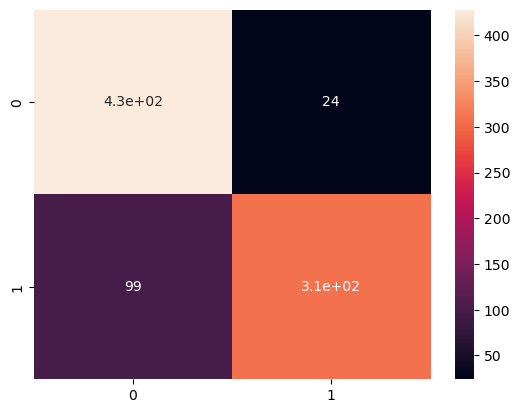

In [35]:
sns.heatmap(cf,annot=True)


In [36]:
precision_score(y_test,lr.predict(x_test))*100

92.74924471299094

In [37]:
recall_score(y_test,lr.predict(x_test))*100

75.61576354679804

In [38]:
f1_score(y_test,lr.predict(x_test))*100

83.31071913161465

2. now we use SMOTE that is advanced over sampling technique that generates synthetic samples of the minority class by interpolating between existing samples

In [40]:
from imblearn.over_sampling import SMOTE


In [41]:
sm = SMOTE()

In [42]:
x_s,y_s = sm.fit_resample(x,y)

In [43]:
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_s,y_s,test_size= 0.2,random_state =42)

In [44]:
lr =  LogisticRegression()
lr.fit(x_train_s,y_train_s)

LogisticRegression()

In [45]:
lr.score(x_test_s,y_test_s)*100

85.08287043309399

In [46]:
cf_2 = confusion_matrix(y_test_s,lr.predict(x_test_s))

<Axes: >

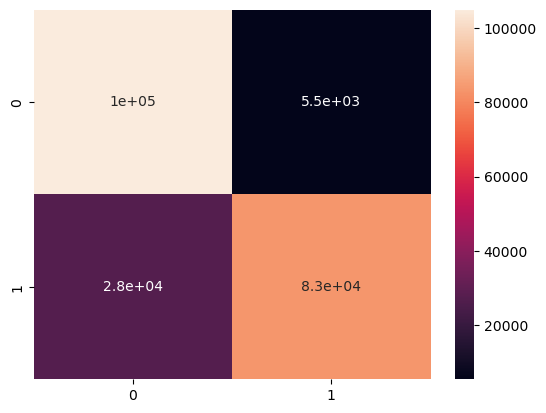

In [47]:
sns.heatmap(cf_2,annot=True)

In [48]:
precision_score(y_test_s,lr.predict(x_test_s))*100

93.81665748867735

In [49]:
recall_score(y_test_s,lr.predict(x_test_s))*100

75.20088642260018

In [50]:
f1_score(y_test_s,lr.predict(x_test_s))*100

83.48359159753787

After testing both over and under sampling over recall value is very low also accuracy is not good enough so now we will try decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(x_train_s,y_train_s)

DecisionTreeClassifier()

In [55]:
dt.score(x_test_s,y_test_s)*100

99.71458248656461

In [56]:
cf_3 = confusion_matrix(y_test_s,dt.predict(x_test_s))

<Axes: >

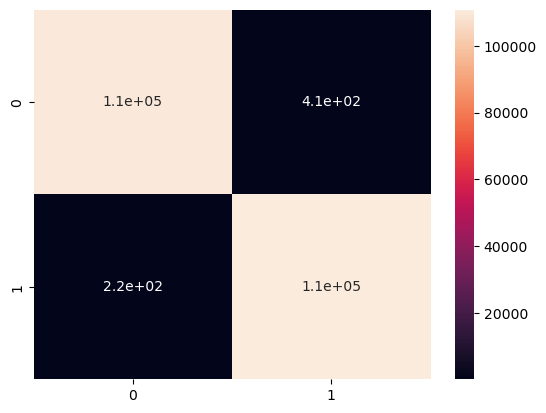

In [57]:
sns.heatmap(cf_3,annot=True)

In [58]:
recall_score(y_test_s,dt.predict(x_test_s))*100

99.80091524935139

In [59]:
precision_score(y_test_s,dt.predict(x_test_s))*100

99.63038903577403

In [136]:
f1_score(y_test,dt.predict(x_test))*100

94.69790382244143

now using decision tree in oversampling data

In [60]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
now using decision tree in oversampling data

In [134]:
dt.score(x_test_s,y_test_s)*100

93.99855484803324

In [141]:
recall_score(y_test_s,dt.predict(x_test_s))*100

94.2661790141251

In [143]:
precision_score(y_test_s,dt.predict(x_test_s))*100

93.79386377692327

In [145]:
f1_score(y_test_s,lr.predict(x_test_s))*100

83.48359159753787